In [3]:
#importando libs
import os
import pandas as pd

In [4]:
#importando dataset
movies = pd.read_csv("P4-Movie-Ratings.csv")
movies

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [5]:
#verificando nome das colunas
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
#ajustando nome das colunas
movies.columns = ["Film","Genre","CriticRating","AudienceRating",
                  "BudgetMillions","Year"]
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
#verificar info dos campos
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 35.0+ KB


In [11]:
#transformando a coluna Film em categoria
movies.Film=movies["Film"].astype("category")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 35.0+ KB


In [36]:
#transformando demais colunas em categoria
movies.Genre=movies["Genre"].astype("category")
movies.Year=movies["Year"].astype("category")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 29.9 KB


In [37]:
#verificando categorias criadas
print(movies.Genre.cat.categories)
print(movies.Year.cat.categories)

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')
Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')


In [38]:
#importando seaborn e pyplot para graficos
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


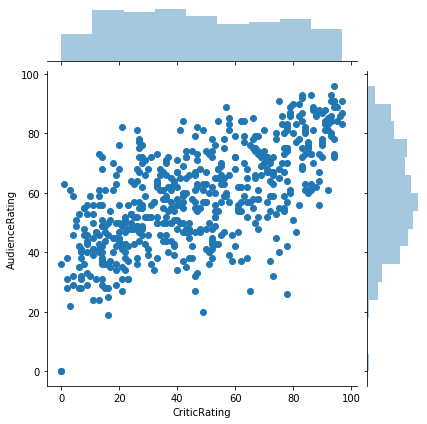

In [40]:
#gerando grafico de disperção das notas da audiencia vs. crítica
j= sns.jointplot(data=movies, x="CriticRating", y="AudienceRating" )

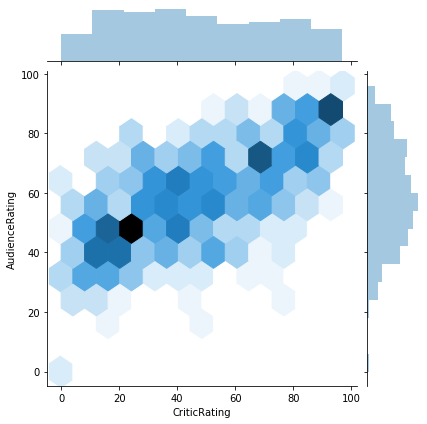

In [41]:
j= sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", kind="hex" )

In [ ]:
#histograms

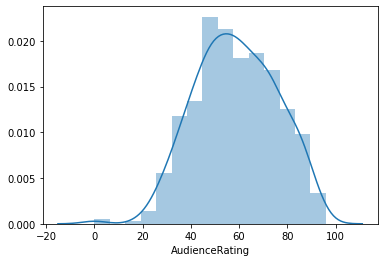

In [42]:
#distribuição das notas da audiencia
m1=sns.distplot(movies.AudienceRating, bins=15)

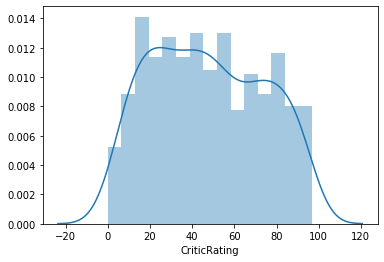

In [43]:
#distribuição das notas da crítica
m2=sns.distplot(movies.CriticRating, bins=15)

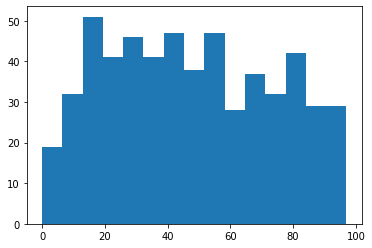

In [44]:
m3=plt.hist(movies.CriticRating, bins=15)

In [58]:
#Stacked Histograms

<function matplotlib.pyplot.show(*args, **kw)>

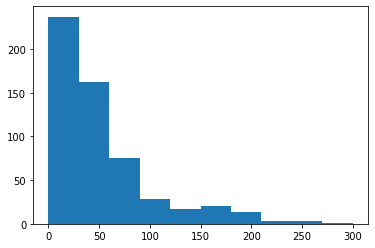

In [45]:
#distribuição de budget dos filmes
plt.hist(movies.BudgetMillions)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

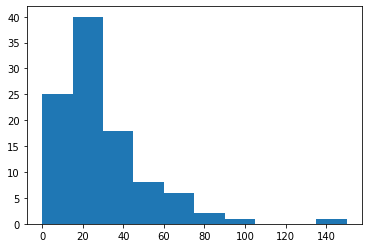

In [46]:
#distribuição de budget dos filmes de drama
filter1=movies.Genre=="Drama"
plt.hist(movies[filter1].BudgetMillions)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

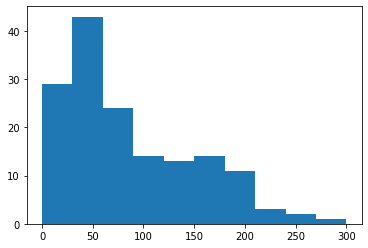

In [30]:
#ou distribuição de budget dos filmes de ação
plt.hist(movies[movies.Genre=="Action"].BudgetMillions)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

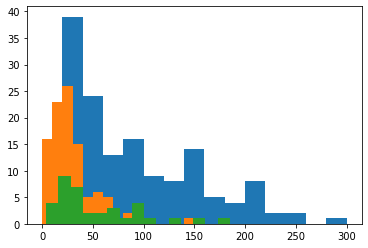

In [47]:
#sobreposto
plt.hist(movies[movies.Genre=="Action"].BudgetMillions, bins=15)

plt.hist(movies[movies.Genre=="Drama"].BudgetMillions, bins=15)

plt.hist(movies[movies.Genre=="Thriller"].BudgetMillions, bins=15)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

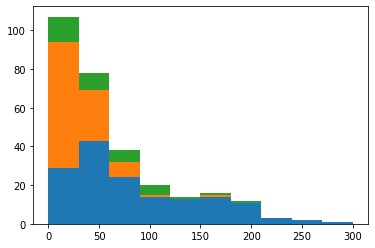

In [48]:
#stacked
plt.hist([movies[movies.Genre=="Action"].BudgetMillions, 
          movies[movies.Genre=="Drama"].BudgetMillions, 
          movies[movies.Genre=="Thriller"].BudgetMillions],
         stacked=1)
plt.show

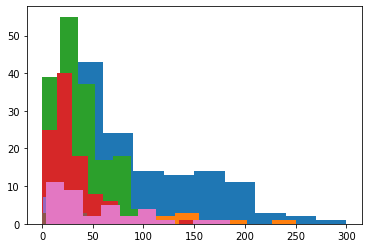

In [49]:
#automatizar sobreposicao
for gen in movies.Genre.cat.categories:
            plt.hist(movies[movies.Genre==gen].BudgetMillions, 
            stacked=1)
            plt.show

<function matplotlib.pyplot.show(*args, **kw)>

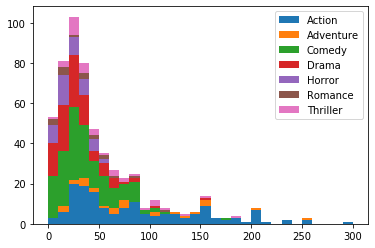

In [50]:
#automatiza stacked 
list1=list()
mylabels= list()
for gen in movies.Genre.cat.categories:
            list1.append(movies[movies.Genre==gen].BudgetMillions)#gerando lista de n categorias
            mylabels.append(gen)
            
h=plt.hist(list1,bins=30, stacked=1, rwidth=1, label=mylabels )
plt.legend()
plt.show

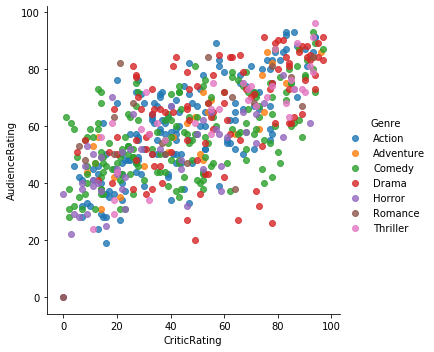

In [51]:
#distribuição de notas com legenda
k= sns.lmplot(data=movies, x="CriticRating", y="AudienceRating", fit_reg=0,hue="Genre")

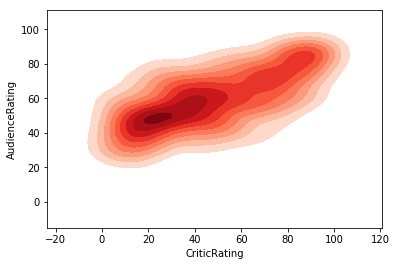

In [128]:
k1=sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=1, shade_lowest=0, cmap="Reds",)

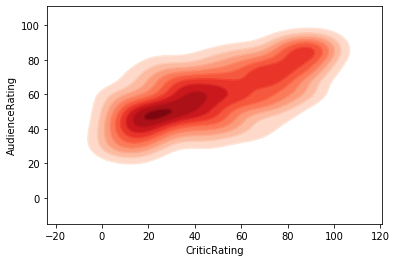

In [52]:
k1=sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=1, shade_lowest=0, cmap="Reds",)
k1b=sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap="Reds",)#sobrepondo

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


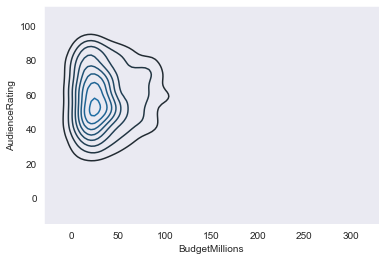

In [56]:
#relação entre nota da audiência e budget
sns.set_style("dark")
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

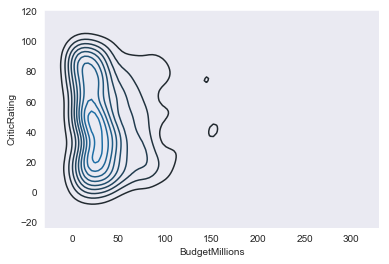

In [149]:
#relação entre nota da crítica e budget
sns.set_style("dark")
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

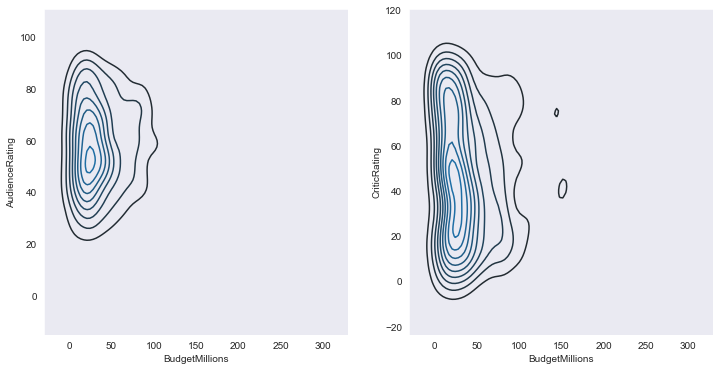

In [57]:
f,axes= plt.subplots(1,2, figsize=(12,6))
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])

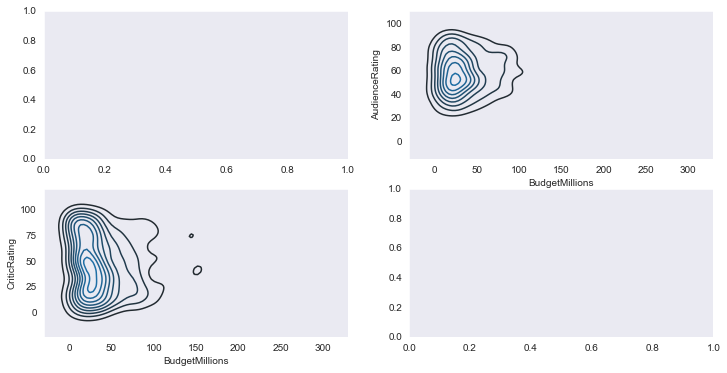

In [161]:
f,axes= plt.subplots(2,2, figsize=(12,6))
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,1])
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1,0])

[(-20, 160)]

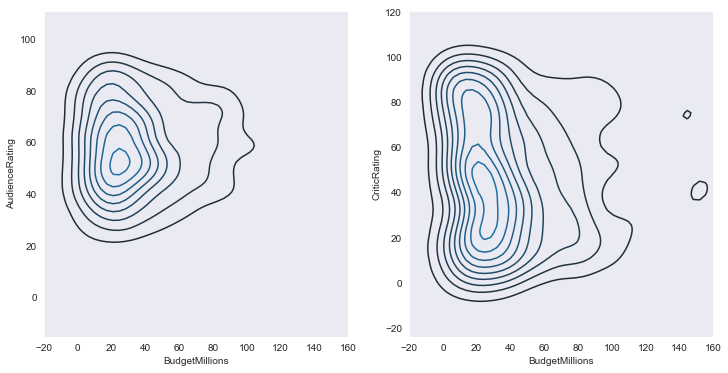

In [166]:
f,axes= plt.subplots(1,2, figsize=(12,6), sharex=True)
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

In [167]:
#violinplot

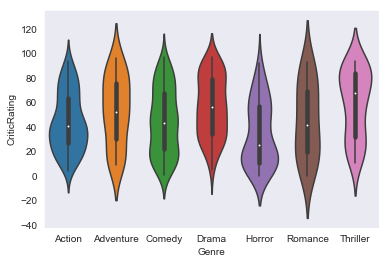

In [174]:
#violinplot gênero vs. nota da crítica
z=sns.violinplot(data=movies, x="Genre", y="CriticRating")

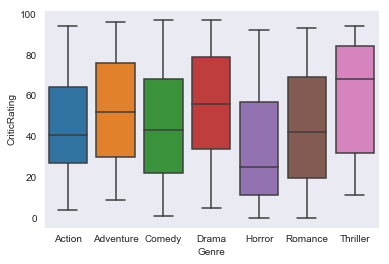

In [175]:
#boxplot gênero vs. nota da crítica
w=sns.boxplot(data=movies, x="Genre", y="CriticRating")

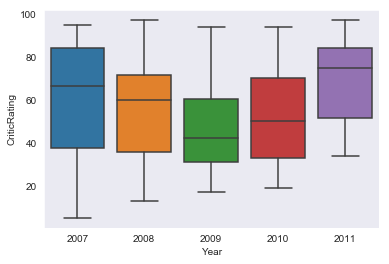

In [176]:
#boxplot do gênero drama,ano vs. nota da crítica
w=sns.boxplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

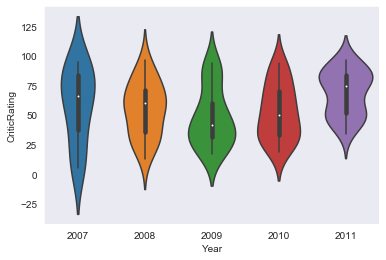

In [58]:
#violin do gênero drama,ano vs. nota da crítica
z=sns.violinplot(data=movies[movies.Genre=="Drama"], x="Year", y="CriticRating")

In [180]:
#facet grid

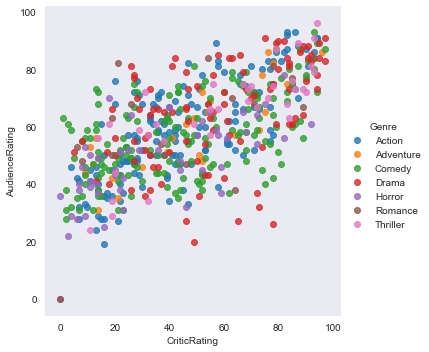

In [59]:
j= sns.lmplot(data=movies, x="CriticRating", y="AudienceRating", fit_reg=0, hue="Genre" )

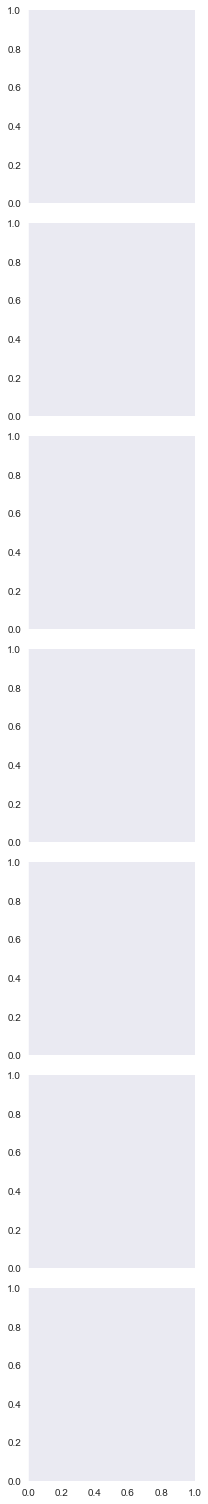

In [60]:
#criando facetgrid, 1 linha por gênero
g=sns.FacetGrid(movies, row="Genre", hue="Genre")

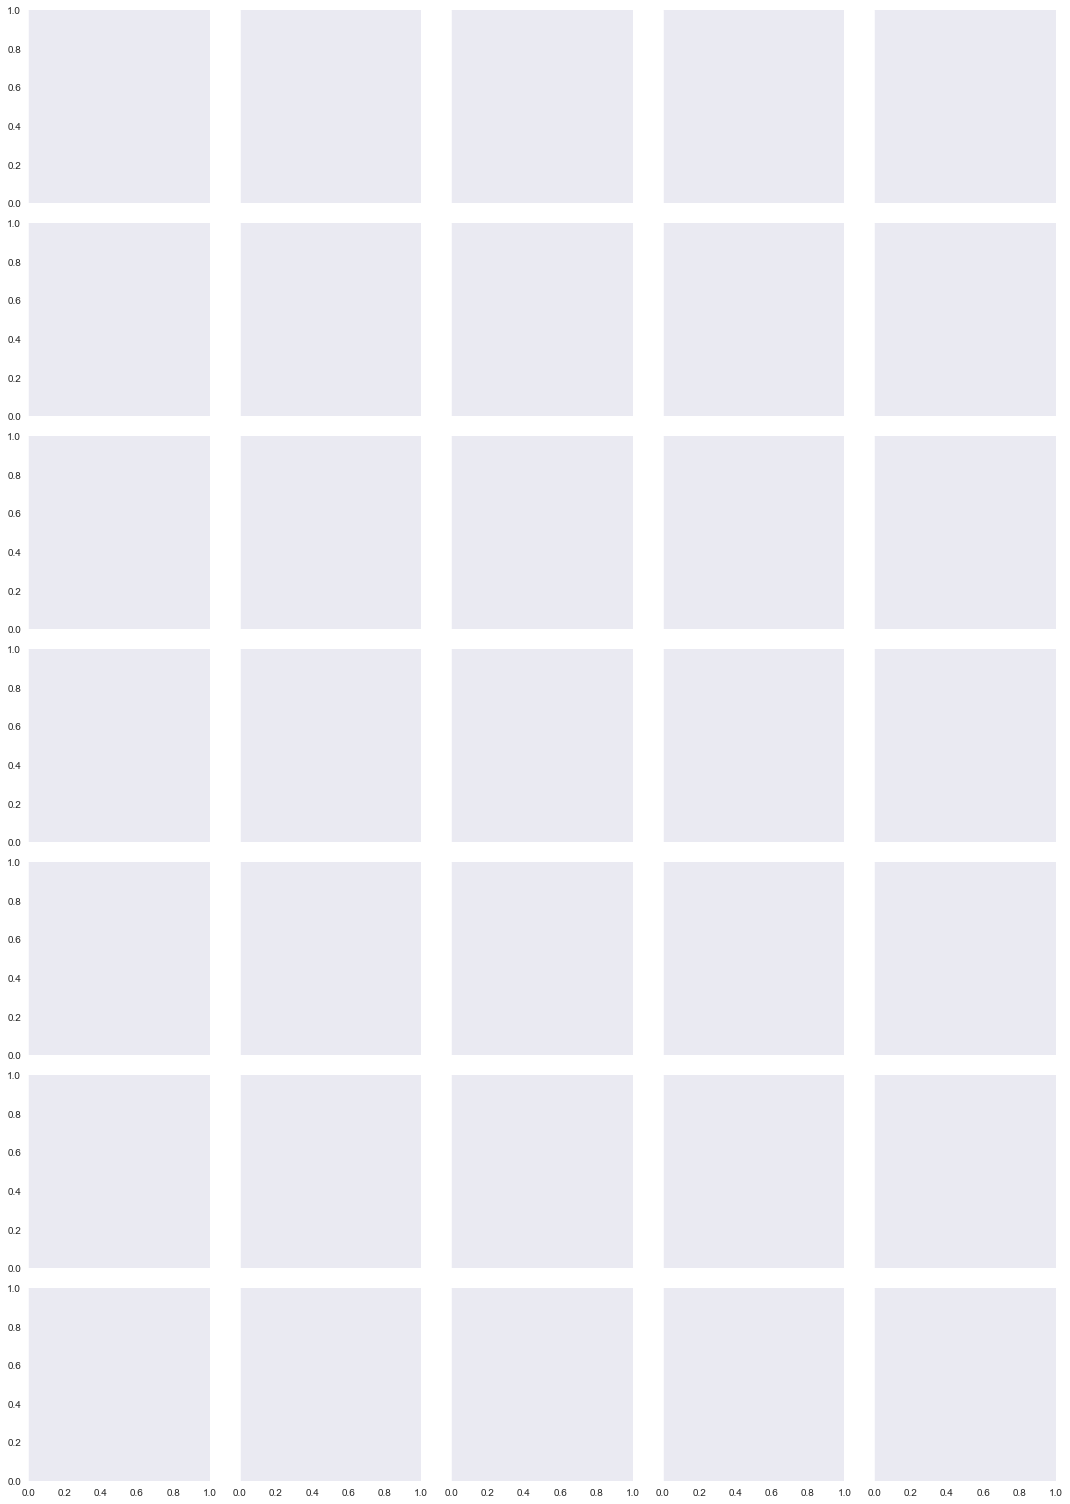

In [61]:
#criando facetgrid, uma coluna para cada ano
g=sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre",)

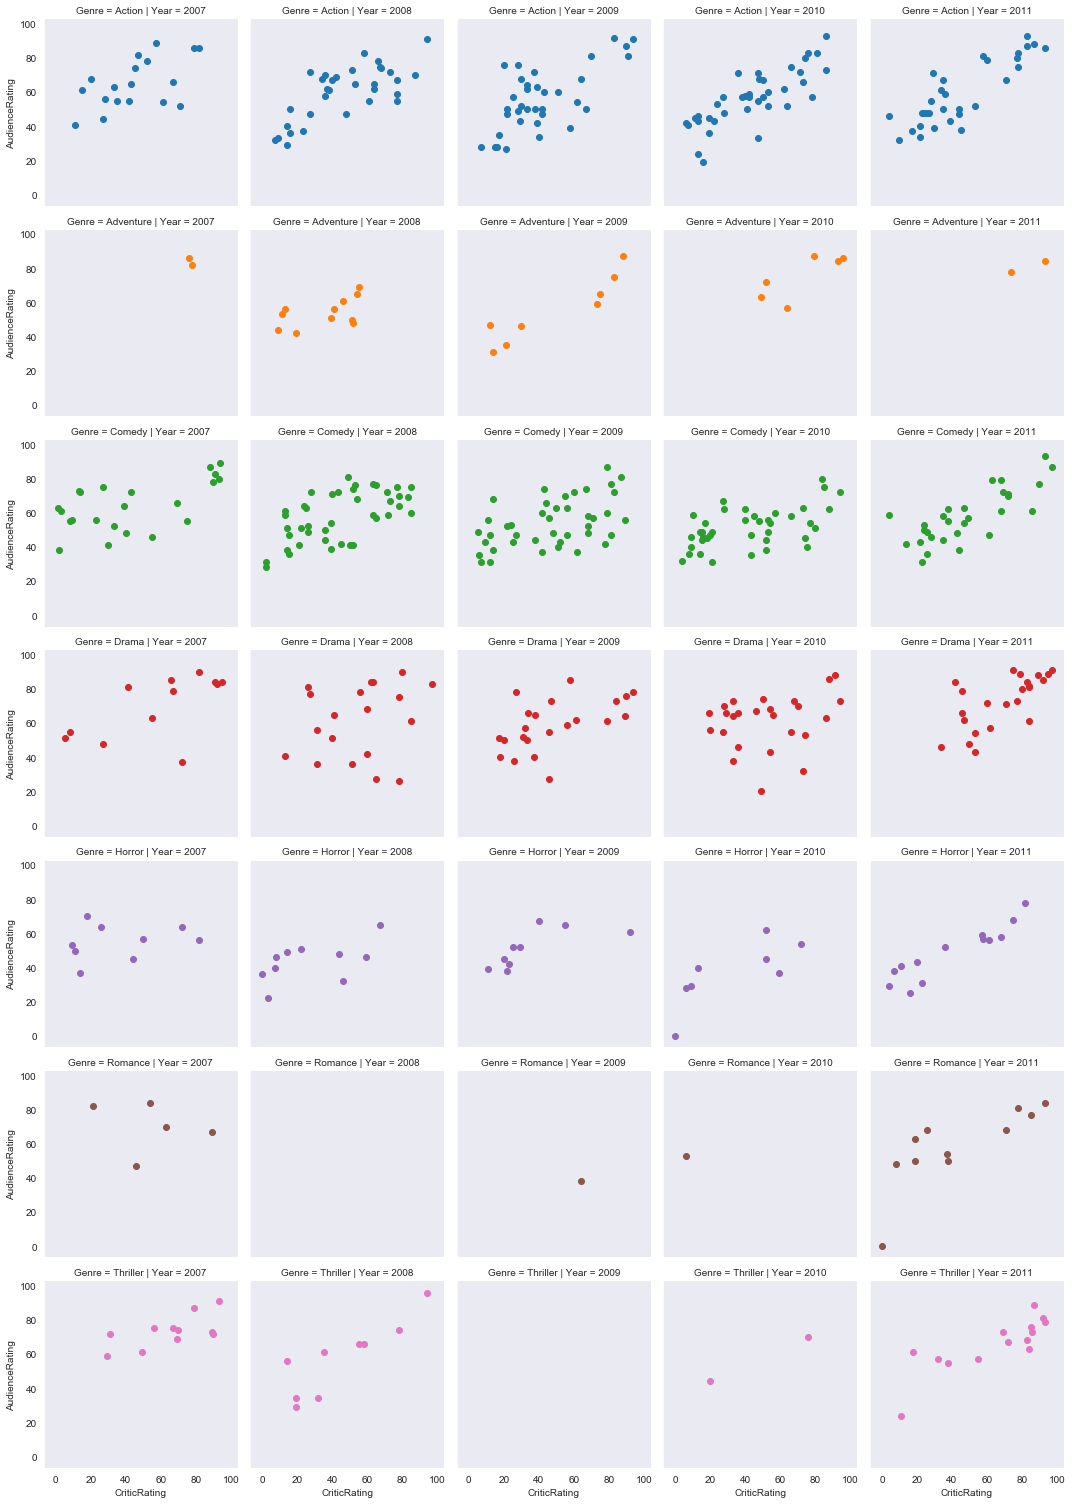

In [62]:
#grafico de distribuição de nota da audiência vs. crítica dividido por faces de ano e gênero
g=sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre",)
g = g.map(plt.scatter, "CriticRating", "AudienceRating")

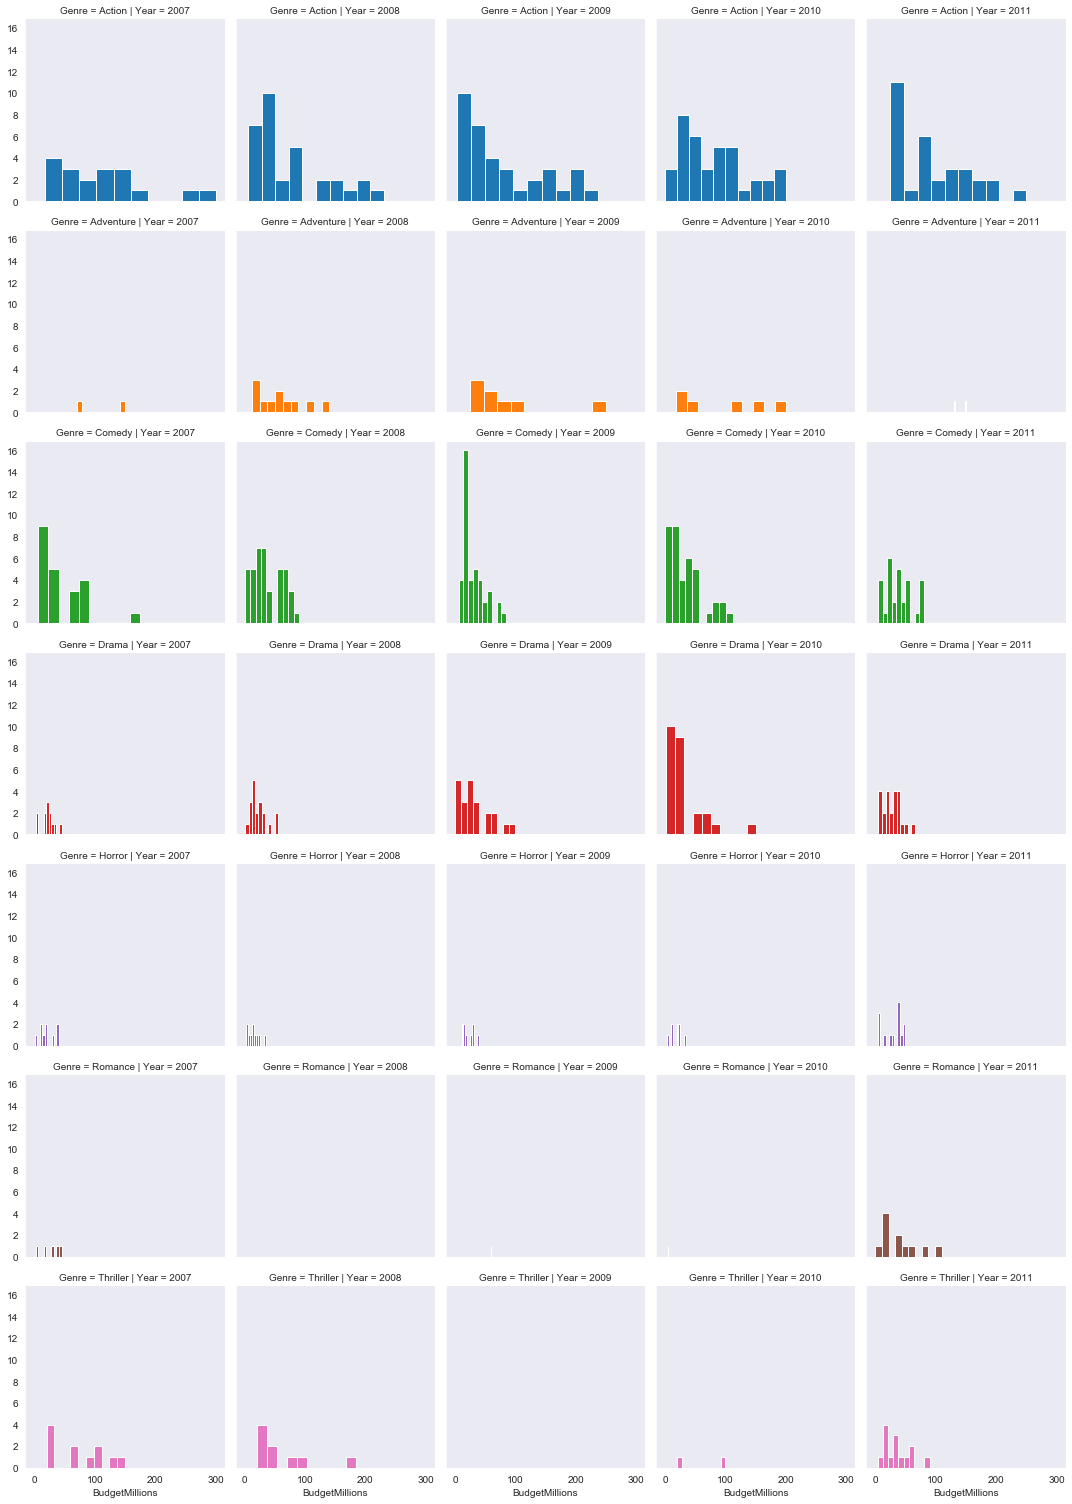

In [63]:
#grafico de distribuição de budget dividido por faces de ano e gênero
g=sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre",)
g = g.map(plt.hist, "BudgetMillions")

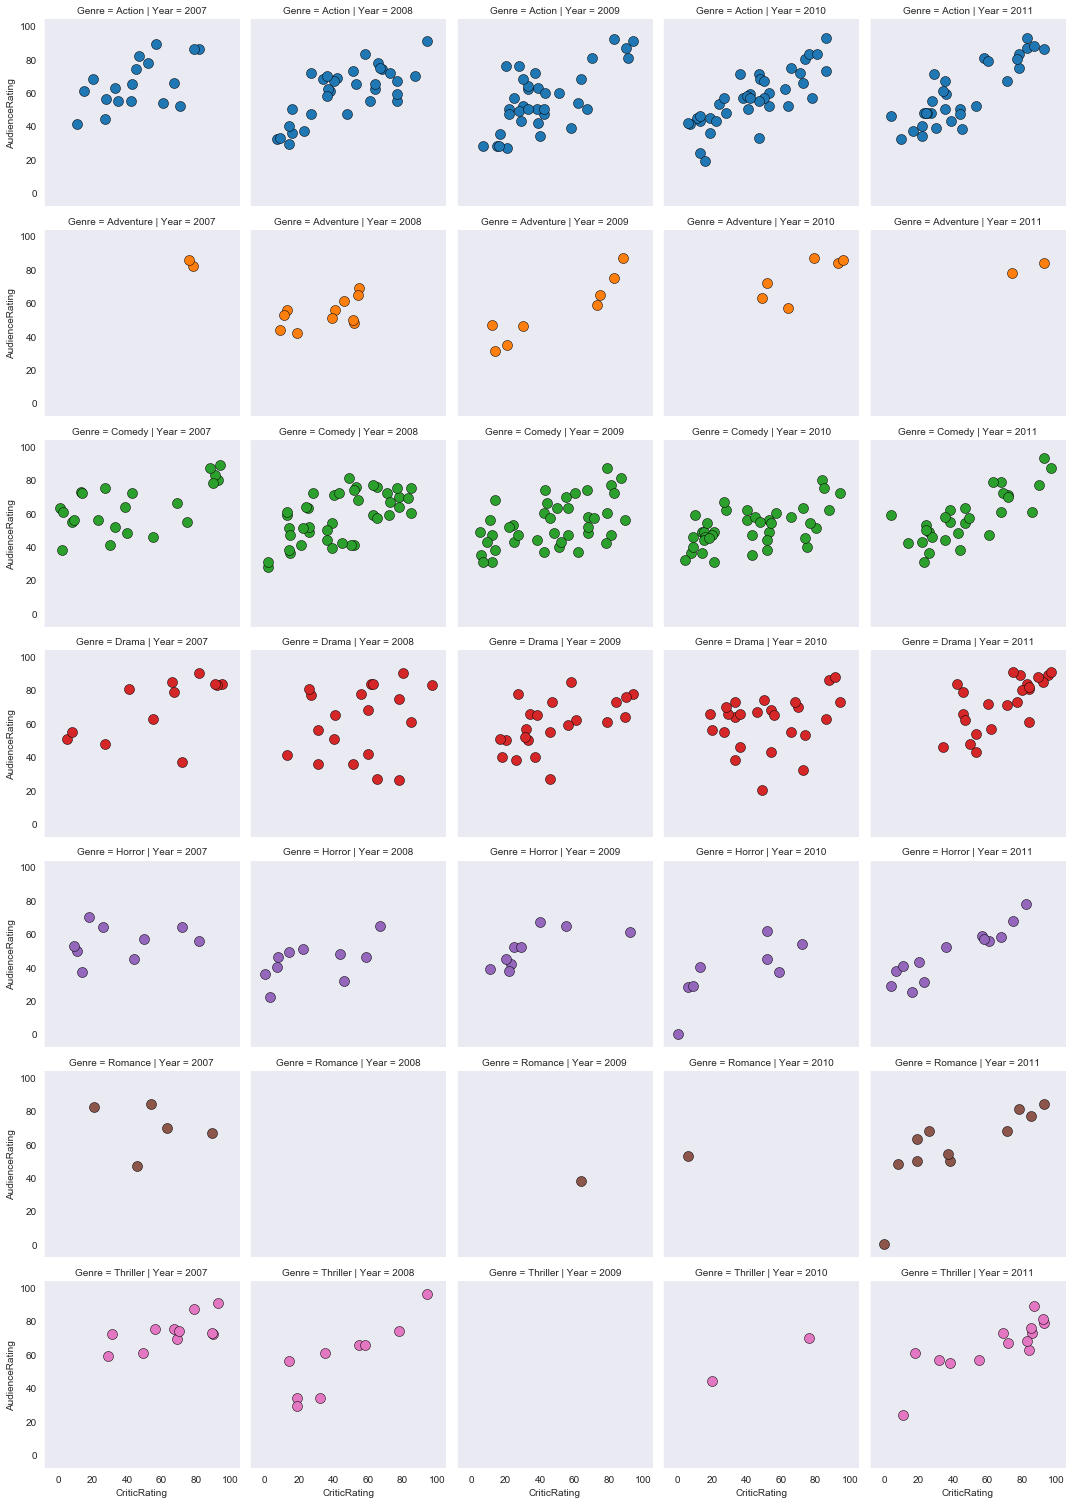

In [65]:
#alterando visual
g=sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre",)
kws = dict(s=100,linewidth=0.5,edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)

In [ ]:
#mudando eixox e y e adicionando diagonal

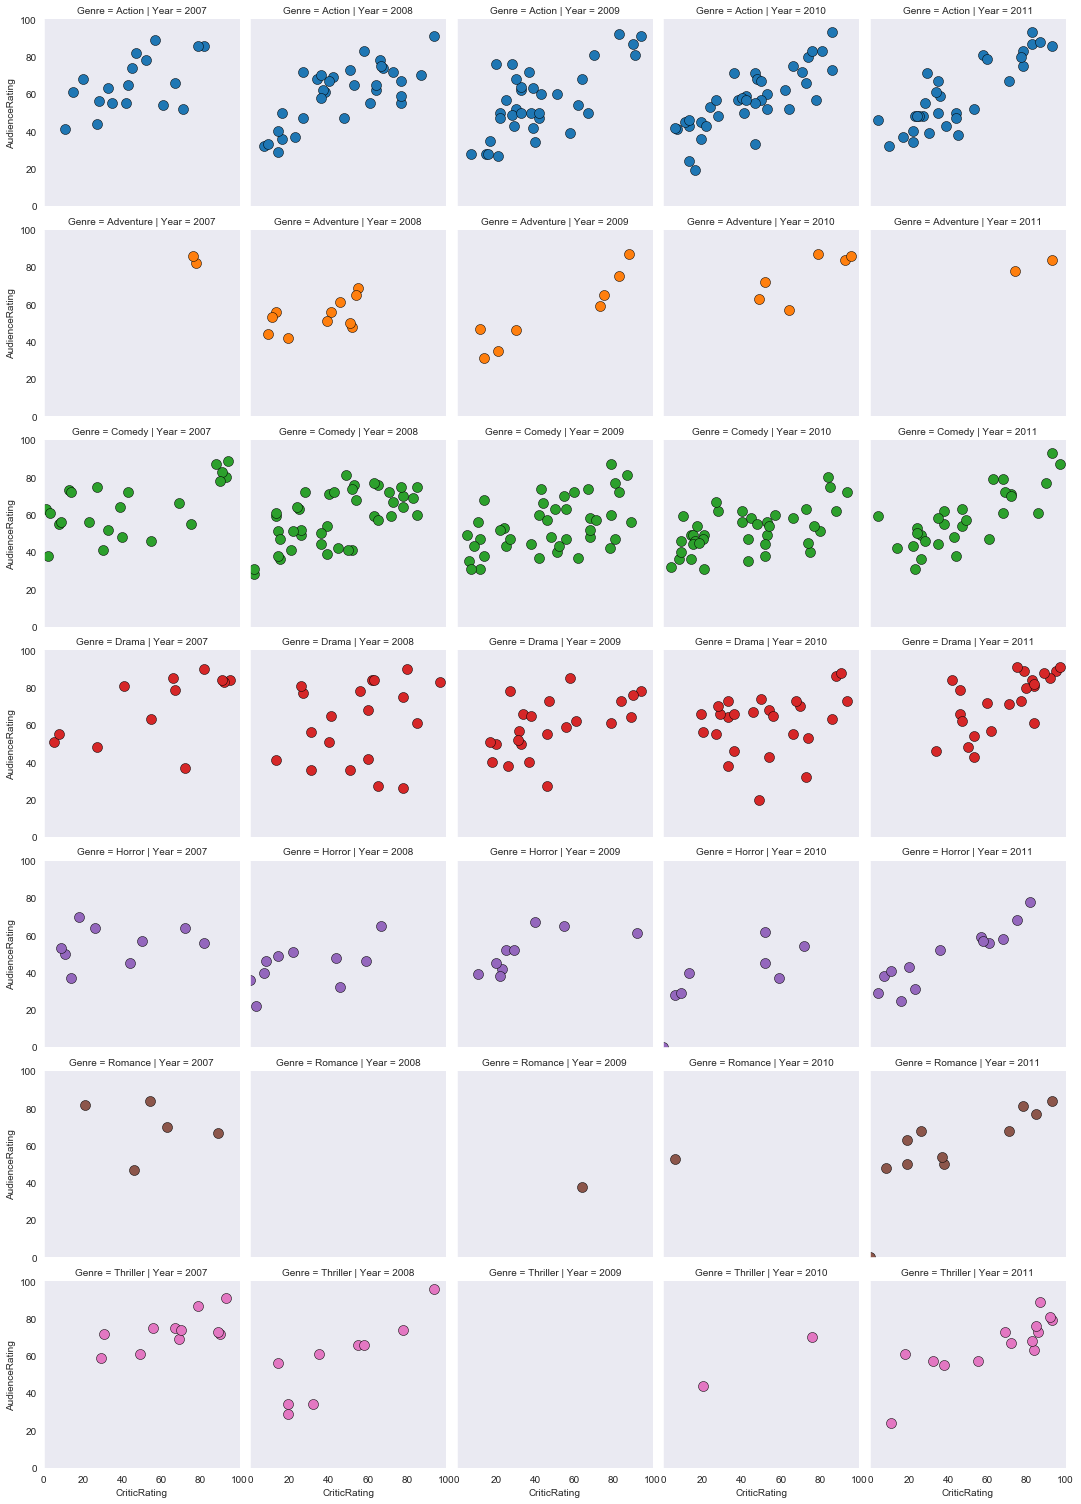

In [66]:
g=sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre",)
kws = dict(s=100,linewidth=0.5,edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)
g.set(xlim=(0,100), ylim=(0,100))

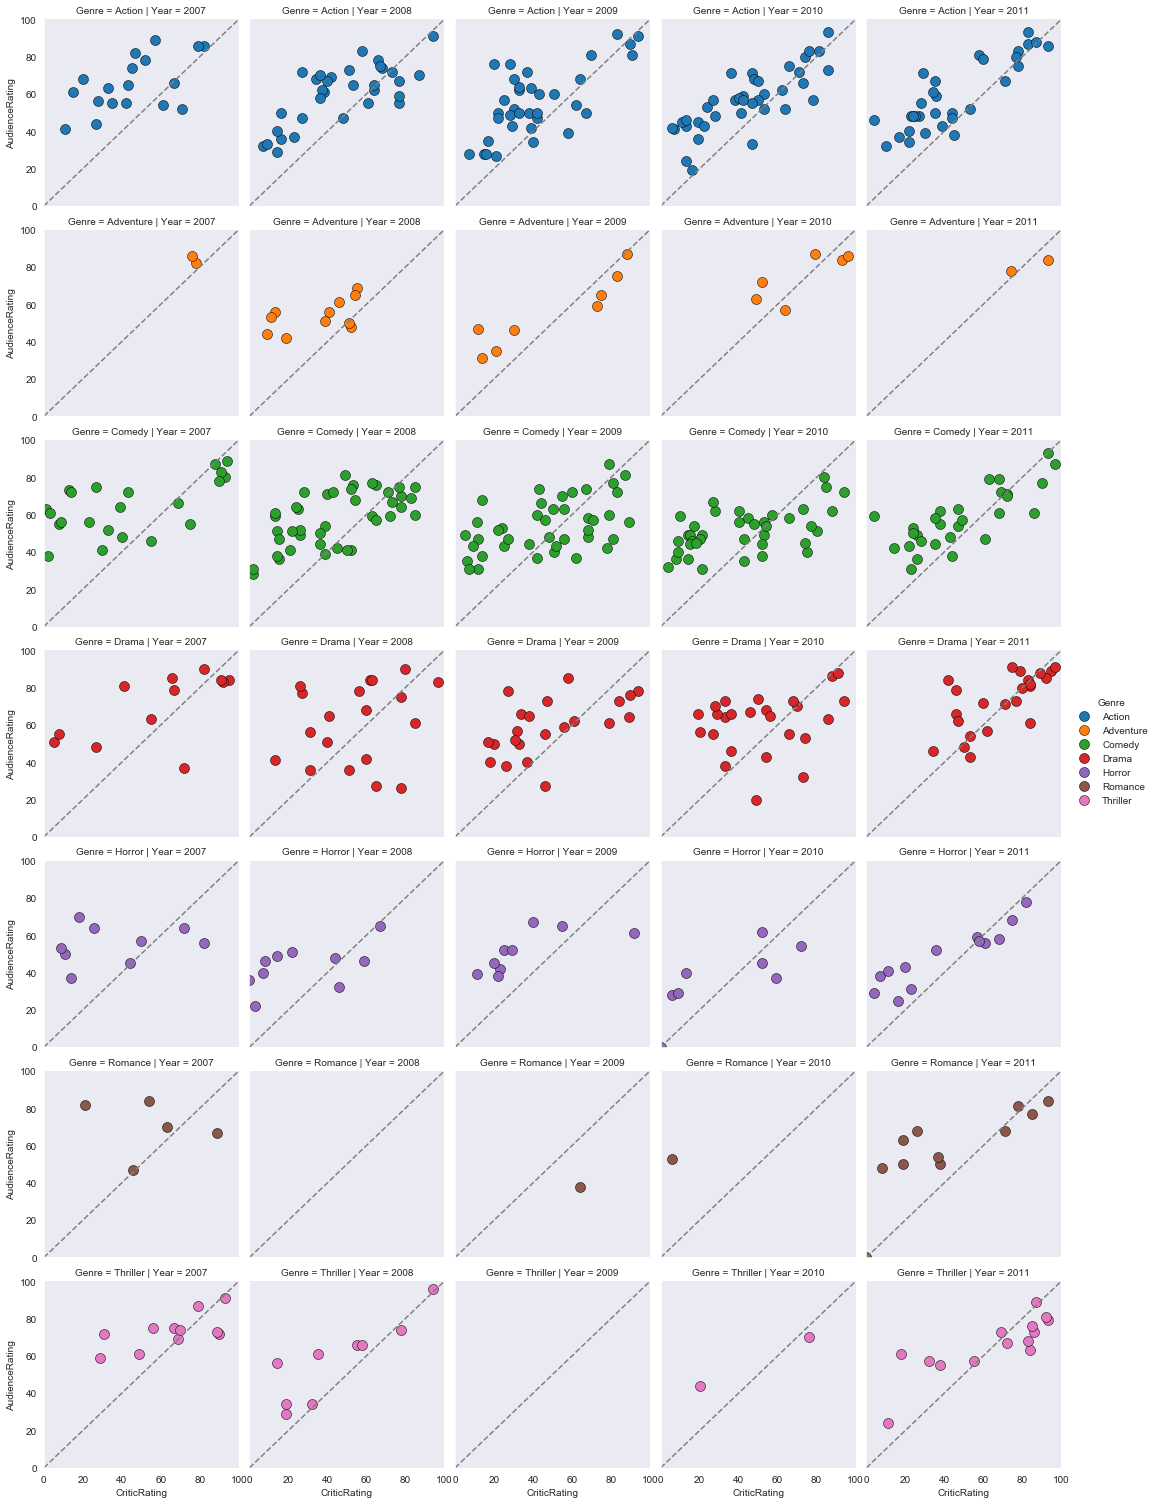

In [67]:
g=sns.FacetGrid(movies, row="Genre", col="Year", hue="Genre",)
kws = dict(s=100,linewidth=0.5,edgecolor="black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="grey", ls="--")

g.add_legend()



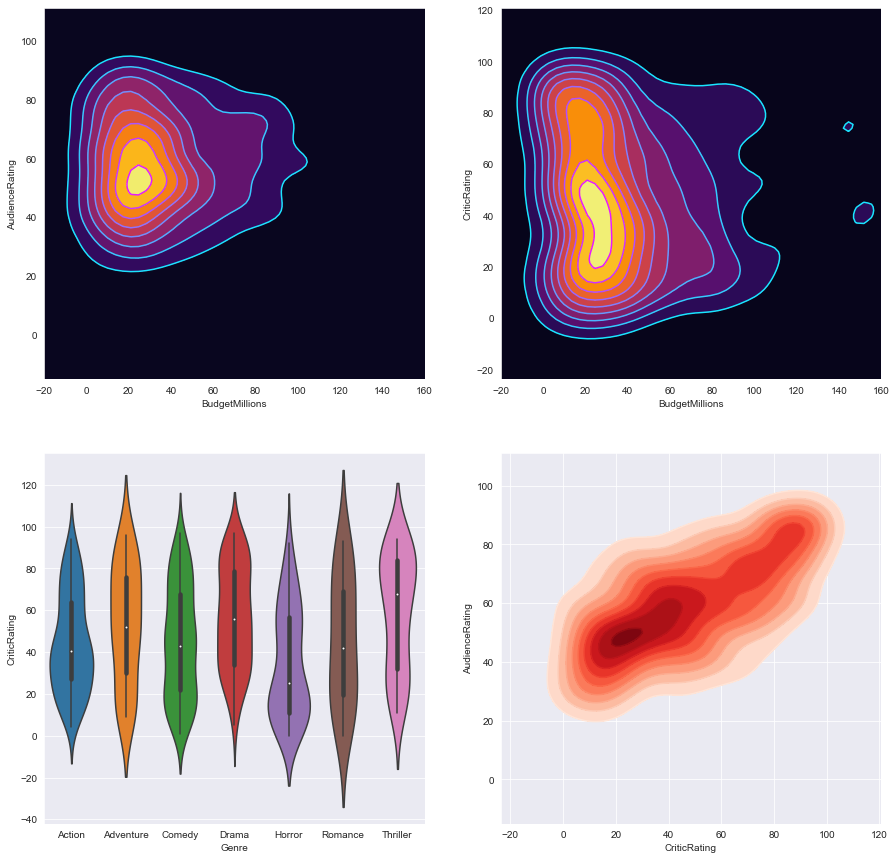

In [68]:
#criando uma visualizaçãocom gráficos de tipos diferentes
sns.set_style("darkgrid")
f, axes=plt.subplots(2,2, figsize=(15,15))
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=1,shade_lowest=1, cmap="inferno", ax=axes[0,0])
k1b= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap="cool", ax=axes[0,0])
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating,shade=1,shade_lowest=1, cmap="inferno", ax=axes[0,1])
k2b=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap="cool", ax=axes[0,1])
z=sns.violinplot(data=movies, x="Genre", y="CriticRating", ax=axes[1,0])
k3=sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=1, shade_lowest=0, cmap="Reds", ax=axes[1,1])
k3b=sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap="Reds",ax=axes[1,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

plt.show()

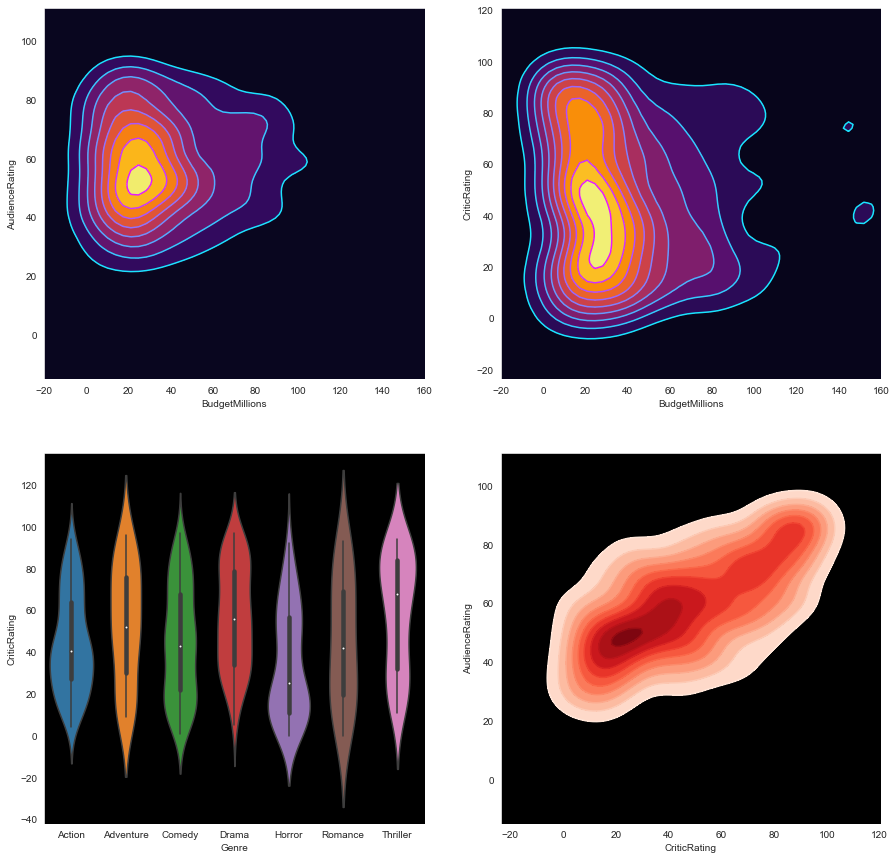

In [69]:
#ajustando estilo
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes=plt.subplots(2,2, figsize=(15,15))
k1=sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=1,shade_lowest=1, cmap="inferno", ax=axes[0,0])
k1b= sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap="cool", ax=axes[0,0])
k2=sns.kdeplot(movies.BudgetMillions, movies.CriticRating,shade=1,shade_lowest=1, cmap="inferno", ax=axes[0,1])
k2b=sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap="cool", ax=axes[0,1])
z=sns.violinplot(data=movies, x="Genre", y="CriticRating", ax=axes[1,0])
k3=sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=1, shade_lowest=0, cmap="Reds", ax=axes[1,1])
k3b=sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap="Reds",ax=axes[1,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

plt.show()

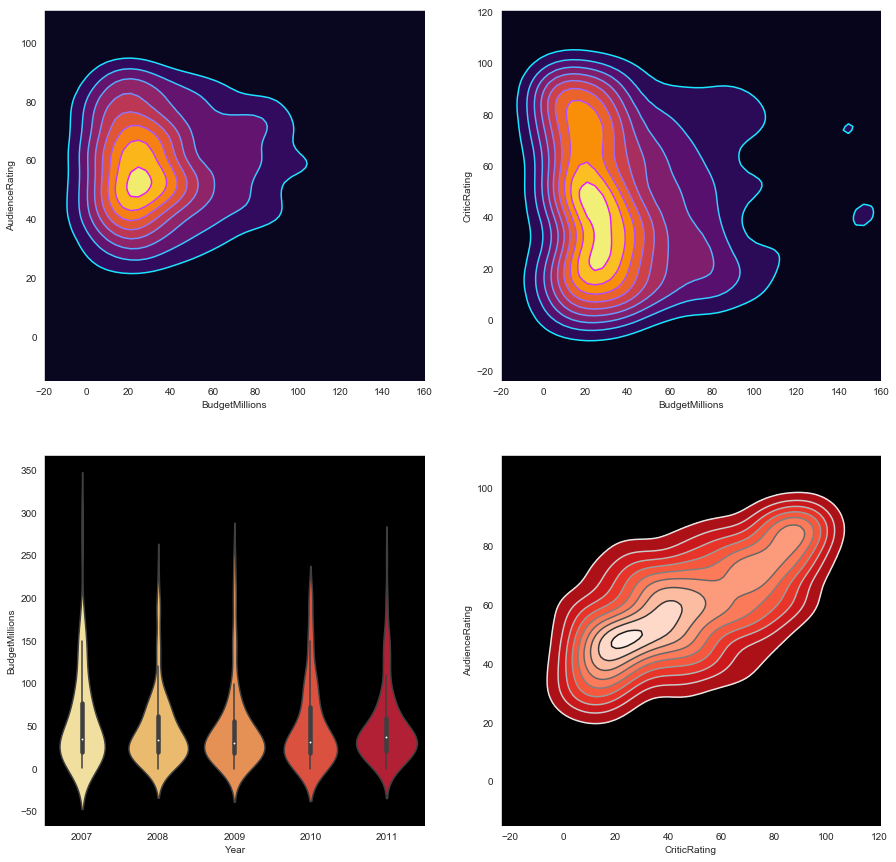

In [257]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes=plt.subplots(2,2, figsize=(15,15))
k1=sns.kdeplot(movies.BudgetMillions, 
               movies.AudienceRating, 
               shade=1,shade_lowest=1, 
               cmap="inferno", 
               ax=axes[0,0])
k1b= sns.kdeplot(movies.BudgetMillions, 
                 movies.AudienceRating, 
                 cmap="cool", 
                 ax=axes[0,0])
k2=sns.kdeplot(movies.BudgetMillions, 
               movies.CriticRating,
               shade=1,
               shade_lowest=1, 
               cmap="inferno", 
               ax=axes[0,1])
k2b=sns.kdeplot(movies.BudgetMillions, 
                movies.CriticRating, 
                cmap="cool", 
                ax=axes[0,1])
z=sns.violinplot(data=movies, 
                 x="Year", 
                 y="BudgetMillions", 
                 palette="YlOrRd",
                 ax=axes[1,0])
k3=sns.kdeplot(movies.CriticRating, 
               movies.AudienceRating, 
               shade=1, 
               shade_lowest=0, 
               cmap="Reds_r", 
               ax=axes[1,1])
k3b=sns.kdeplot(movies.CriticRating, 
                movies.AudienceRating, 
                cmap="gist_gray_r",ax=axes[1,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))

plt.show()

In [258]:
#gráfico de distribuição de budget separado por gênero

<function matplotlib.pyplot.show(*args, **kw)>

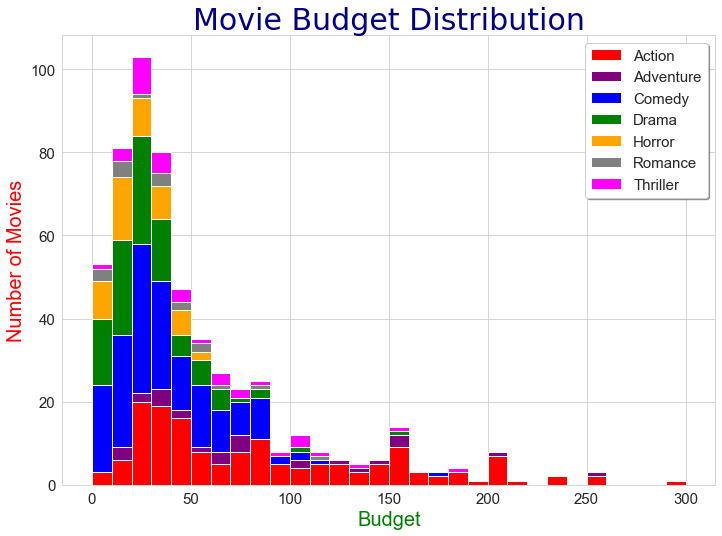

In [78]:
list1=list()
mylabels= list()
for gen in movies.Genre.cat.categories:
            list1.append(movies[movies.Genre==gen].BudgetMillions)#gerando lista de n categorias
            mylabels.append(gen)
            
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
h=plt.hist(list1,bins=30, stacked=1, rwidth=1, label=mylabels, color=["Red","Purple","Blue","Green","Orange","Gray","Magenta"] )
plt.title("Movie Budget Distribution", fontsize=30,
         color="DarkBlue", fontname="Console")
plt.ylabel("Number of Movies", fontsize=20, color="Red")
plt.xlabel("Budget", fontsize=20, color="Green")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={"size":15}, frameon=1, fancybox=1, shadow=1, framealpha=1)
plt.show